(800, 800)
(800, 800)
Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40
Iteration 45
Gradient descent terminated ; In 45 iterations, the minimum displacement has been reached.


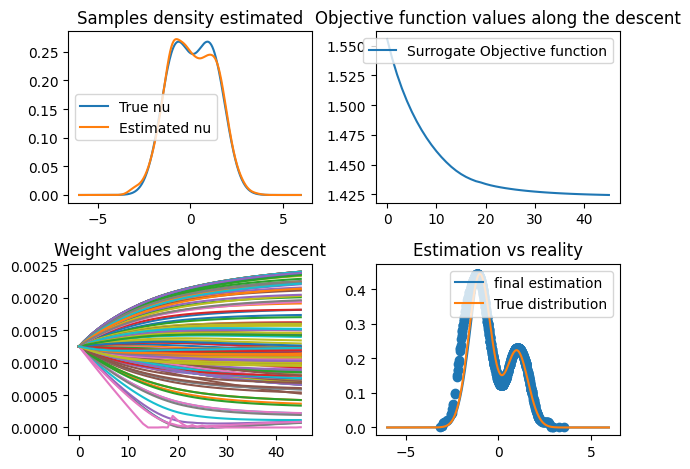

In [2]:
import particle_weights
import numpy as np
import matplotlib.pyplot as plt

Simple example

(400, 400)
(400, 400)
Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40
Iteration 45
Iteration 50
Iteration 55
Iteration 60
Iteration 65
Iteration 70
Iteration 75
Iteration 80
Iteration 85
Iteration 90
Iteration 95
Iteration 100
Iteration 105
Iteration 110
Iteration 115
Iteration 120
Iteration 125
Iteration 130
Iteration 135
Iteration 140
Iteration 145
Iteration 150
Gradient descent terminated ; In 151 iterations, the minimum displacement has been reached.


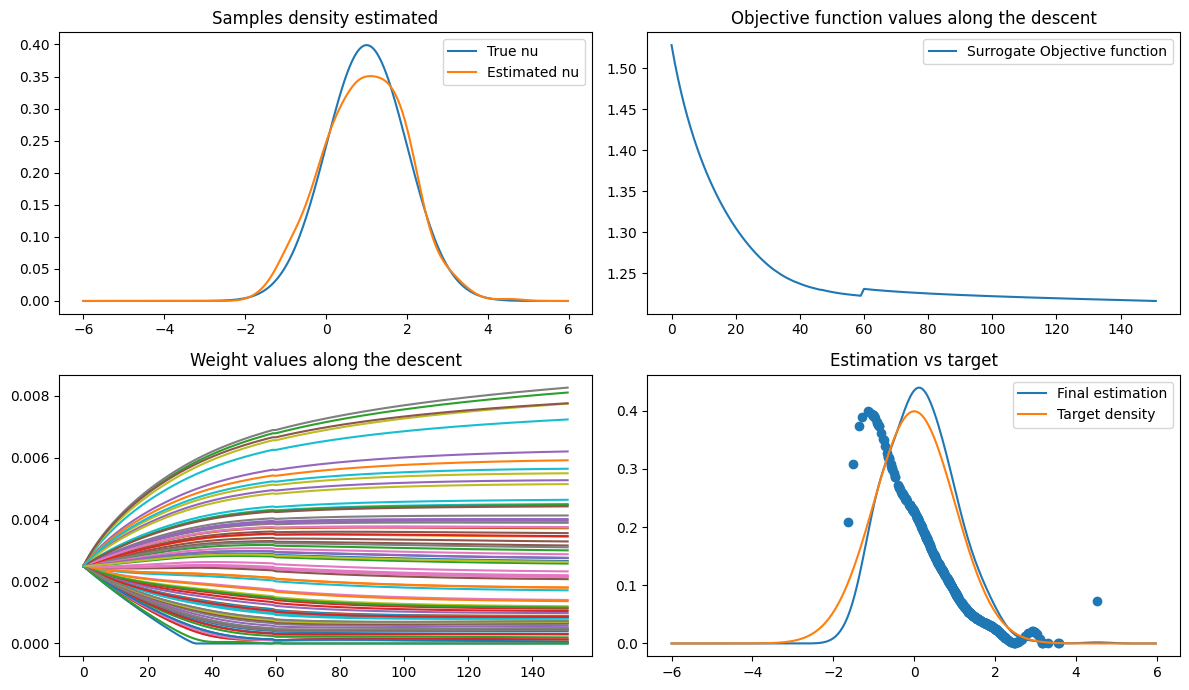

In [11]:
def g(X, sigma): # X: (n,d) -> we want as an output smth of size (n) with ith component g(x[i]) 
    d = len(X[0])
    return np.exp(-np.linalg.norm(X, axis=1)**2/(2*sigma**2))/(sigma**d * (2*np.pi)**(d/2))

def sample_from_nu(n_samples, p_sampling, sampling_centers, sigma_samples, d):
    
    arr = p_sampling * n_samples
    out = np.empty_like(arr, dtype=np.int64)
    n_samples_repartition = np.ceil(arr, out, casting='unsafe')
    n_tot = np.sum(n_samples_repartition)
    X = []
    for i in range(len(n_samples_repartition)):
        X.append(np.random.normal(0, sigma_samples[i], (n_samples_repartition[i], d)) + sampling_centers[i])
    return np.concatenate(X, axis=0)


dim = 1

sampling_centers = np.array([np.array([1])])
n_sampling_centers = len(sampling_centers)
sigma_samples = [1]
c_sampling = np.array([1])
p_sampling = c_sampling/np.sum(c_sampling)

true_centers = np.array([np.array([0])])
n_true_centers = len(true_centers)
sigma_star = [1]
c_star = np.array([1])
p_star = c_star/np.sum(c_star)

def U(X):# X: (n,d)
    density_value = np.zeros((len(X)))
    for i in range(n_true_centers):
        density_value += p_star[i] * g(X - true_centers[i], sigma_star[i])
    return -np.log(density_value)

def nu(X):
    density_value = np.zeros((len(X)))
    for i in range(n_sampling_centers):
        density_value += p_sampling[i] * g(X - sampling_centers[i], sigma_samples[i])
    return density_value

n_samples = 400

X_samples = sample_from_nu(n_samples, p_sampling, sampling_centers, sigma_samples, dim)
U_samples = U(X_samples)

# Algorithm parametrisation:

p0 = np.ones((n_samples))/n_samples
h = 0.0001
max_iter = 400
eps = 0.0001
KL_type = 0
bw = 'silverman'
reg_types = ['h_1']
reg_constants = [0.0005]


solver = particle_weights.GD_estimator(KL_type, p0, U_samples, X_samples, h, eps, max_iter, bw, reg_types, reg_constants)

solver.optimise()

# Display

alpha = solver.alpha

fig,ax = plt.subplots(2,2)
fig.set_size_inches(12,7)

X_eval = 6 * ((np.arange(400)/400).reshape(-1, 1)*2-1)
estimated_modes = particle_weights.KDE_evaluation(X_samples, X_eval, alpha)
real_modes = nu(X_eval)
ax[0][0].plot(X_eval, real_modes, label='True nu')
ax[0][0].plot(X_eval, estimated_modes, label='Estimated nu')
ax[0][0].set_title('Samples density estimated')
ax[0][0].legend()

y_1 = []
for i in range(len(solver.p_list)):
    val = solver.surrogate_function(solver.p_list[i])[0]
    y_1.append(val)
ax[0][1].plot(np.arange(len(solver.p_list)), y_1, label='Surrogate Objective function')
ax[0][1].set_title('Objective function values along the descent')
ax[0][1].legend()

#y_2=[]
#for i in range( M ):
#    y_2.append(KL_wrt_mu(solver, U, solver.p_list[i%len(solver.p_list)], solver.sigma_list[i%len(solver.sigma_list)]))
#ax[2][1].plot(np.arange(M), y_2, label='Ideal objective function')
#ax[2][1].set_title('Objective function values along the descent')
#ax[2][1].legend()

for i in range(n_samples):
    if i%5==0:# One every 5 is displayed
        ax[1][0].plot(np.arange(len(solver.p_list)), np.array(solver.p_list)[:,i], label='p_'+str(i))
ax[1][0].set_title('Weight values along the descent')


y = solver.evaluate(X_eval, solver.p_list[-1])
z = np.exp(-U(X_eval))
ax[1][1].plot(X_eval, y, label='Final estimation')
ax[1][1].plot(X_eval, z, label='Target density')
ax[1][1].scatter(X_samples, solver.p_list[-1] * max(z) / max(solver.p_list[-1]))
ax[1][1].set_title('Estimation vs target')
ax[1][1].legend()

plt.tight_layout()
plt.show()



2 modes, different example

(800, 800)
(800, 800)
Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40
Iteration 45
Gradient descent terminated ; In 47 iterations, the minimum displacement has been reached.


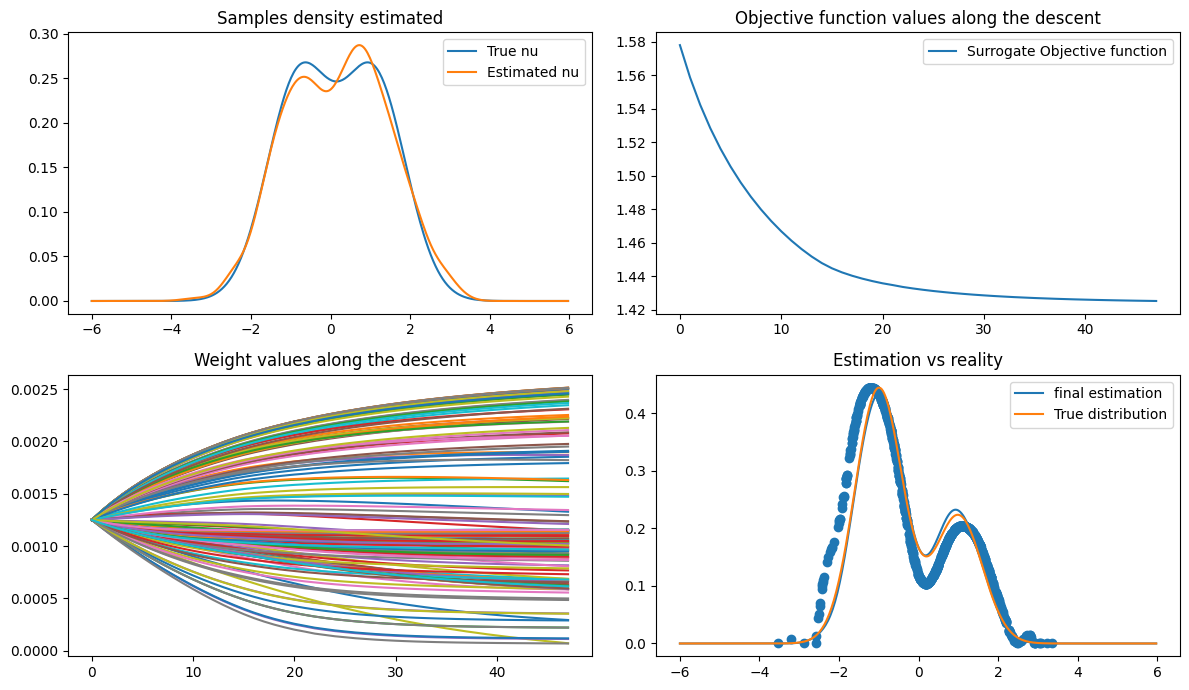

In [13]:
dim = 1

sampling_centers = np.array([np.array([-0.8]), np.array([1.1])])
n_sampling_centers = len(sampling_centers)
sigma_samples = [0.8, 0.8]
c_sampling = np.array([1, 1])
p_sampling = c_sampling/np.sum(c_sampling)

true_centers = np.array([np.array([-1]), np.array([1])])
n_true_centers = len(true_centers)
sigma_star = [0.6, 0.6]
c_star = np.array([2,1])
p_star = c_star/np.sum(c_star)

def U(X):# X: (n,d)
    density_value = np.zeros((len(X)))
    for i in range(n_true_centers):
        density_value += p_star[i] * g(X - true_centers[i], sigma_star[i])
    return -np.log(density_value)

def nu(X):
    density_value = np.zeros((len(X)))
    for i in range(n_sampling_centers):
        density_value += p_sampling[i] * g(X - sampling_centers[i], sigma_samples[i])
    return density_value

n_samples = 800

X_samples = sample_from_nu(n_samples, p_sampling, sampling_centers, sigma_samples, dim)
U_samples = U(X_samples)

# Algorithm parametrisation:

p0 = np.ones((n_samples))/n_samples
h = 0.0001
max_iter = 100
eps = 0.0001
KL_type = 0
bw = 'cv_ml'
reg_types = ['h_1']
reg_constants = [0.0001]


solver = particle_weights.GD_estimator(KL_type, p0, U_samples, X_samples, h, eps, max_iter, bw, reg_types, reg_constants)

solver.optimise()

# Display

alpha = solver.alpha

fig,ax = plt.subplots(2,2)
fig.set_size_inches(12,7)

X_eval = 6 * ((np.arange(400)/400).reshape(-1, 1)*2-1)
estimated_modes = particle_weights.KDE_evaluation(X_samples, X_eval, alpha)
real_modes = nu(X_eval)
ax[0][0].plot(X_eval, real_modes, label='True nu')
ax[0][0].plot(X_eval, estimated_modes, label='Estimated nu')
ax[0][0].set_title('Samples density estimated')
ax[0][0].legend()

y_1 = []
for i in range(len(solver.p_list)):
    val = solver.surrogate_function(solver.p_list[i])[0]
    y_1.append(val)
ax[0][1].plot(np.arange(len(solver.p_list)), y_1, label='Surrogate Objective function')
ax[0][1].set_title('Objective function values along the descent')
ax[0][1].legend()

#y_2=[]
#for i in range( M ):
#    y_2.append(KL_wrt_mu(solver, U, solver.p_list[i%len(solver.p_list)], solver.sigma_list[i%len(solver.sigma_list)]))
#ax[2][1].plot(np.arange(M), y_2, label='Ideal objective function')
#ax[2][1].set_title('Objective function values along the descent')
#ax[2][1].legend()

for i in range(n_samples):
    if i%5==0:# One every 5 is displayed
        ax[1][0].plot(np.arange(len(solver.p_list)), np.array(solver.p_list)[:,i], label='p_'+str(i))
ax[1][0].set_title('Weight values along the descent')


y = solver.evaluate(X_eval, solver.p_list[-1])
z = np.exp(-U(X_eval))
ax[1][1].plot(X_eval, y, label='final estimation')
ax[1][1].plot(X_eval, z, label='True distribution')
ax[1][1].scatter(X_samples, solver.p_list[-1] * max(z) / max(solver.p_list[-1]))
ax[1][1].set_title('Estimation vs reality')
ax[1][1].legend()

plt.tight_layout()
plt.show()

